In [1]:
"""Generate thick lines"""
import os
import numpy as np
import imageio
from tqdm import tqdm
from wavebench import wavebench_dataset_path
from wavebench import utils
import matplotlib.pyplot as plt

data_path = os.path.join(wavebench_dataset_path, "time_varying/thick_lines")

if not os.path.exists(data_path):
  os.makedirs(data_path)

print(f'saved to {data_path}')



saved to /home/liu0003/Desktop/projects/wavebench/wavebench_dataset/time_varying/thick_lines


In [6]:

# def generate_random_lines_dataset(num_data):
"""Generate thick lines"""
n = 512
n_seg_min = 5 #1
n_seg_max = 10 #5
min_length = 50
max_length = 100
min_width = 20
max_width = 40 #12
min_amp = .2

# utils.seed_everything(42)

# for k in tqdm(range(num_data)):
k = 0

utils.seed_everything(k)

n_range = np.arange(n)
xv, yv = np.meshgrid(n_range, n_range)
gp = np.vstack((xv.reshape(1, n**2), yv.reshape(1, n**2)))
n_seg = int(np.random.rand()*(n_seg_max-n_seg_min)) + n_seg_min

f = np.zeros((n, n))

for _ in range(n_seg):

    center = np.floor(np.random.rand(2, 1) * n)
    angle = np.random.rand(1) * np.pi
    unit_dir = np.array([np.cos(angle), np.sin(angle)])
    unit_ort = np.array([-np.sin(angle), np.cos(angle)])
    length = np.random.rand(1) * (max_length - min_length) + min_length
    width = np.random.rand(1) * (max_width - min_width) + min_width
    xi1 = np.dot(unit_dir.T, gp - center)
    xi2 = np.dot(unit_ort.T, gp - center)
    idx = (np.abs(xi1) <= length / 2) & (np.abs(xi2) <= width / 2)
    amp = np.random.rand(1) * (1 - min_amp) + min_amp
    f += amp * idx.astype(float).reshape((n, n))

# imageio.imwrite(
#     os.path.join(f'{data_path}/{k}.png'), (f * 255).astype(np.uint8))
#   return None
# if __name__ == '__main__':
#   generate_random_lines_dataset(3000)

In [7]:
512 / 6

85.33333333333333

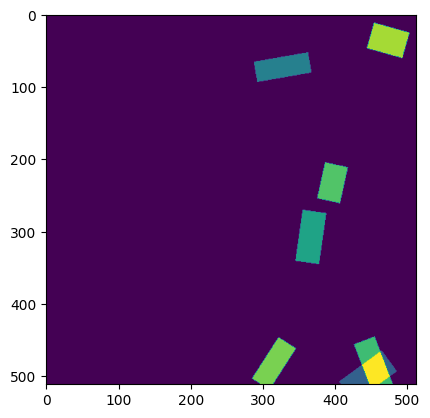

In [8]:
plt.imshow(f)